<a href="https://colab.research.google.com/github/anupojuharshita/GEN_AI-project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving solidWhiteCurve.jpg to solidWhiteCurve (1).jpg


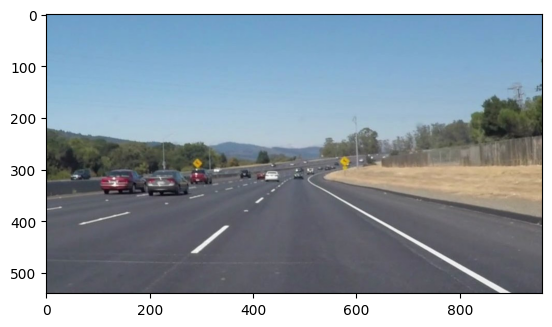

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("/content/solidWhiteCurve.jpg")  # Change to your file name
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Display the image
plt.imshow(image)
plt.axis("on")  # Hide axes
plt.show()


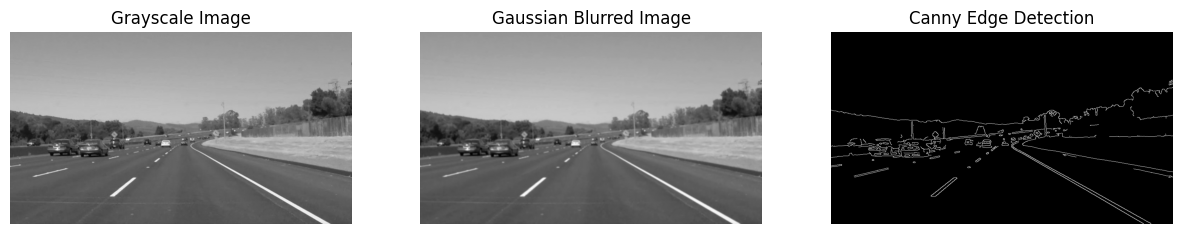

In [4]:
import cv2
import matplotlib.pyplot as plt

image_path = "/content/solidWhiteCurve.jpg"
image = cv2.imread(image_path)


gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


blurred_image = cv2.GaussianBlur(gray_image, (5,5), 0)

edges = cv2.Canny(blurred_image, threshold1=50, threshold2=150)


fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title("Grayscale Image")
axes[0].axis("off")

axes[1].imshow(blurred_image, cmap='gray')
axes[1].set_title("Gaussian Blurred Image")
axes[1].axis("off")

axes[2].imshow(edges, cmap='gray')
axes[2].set_title("Canny Edge Detection")
axes[2].axis("off")

plt.show()


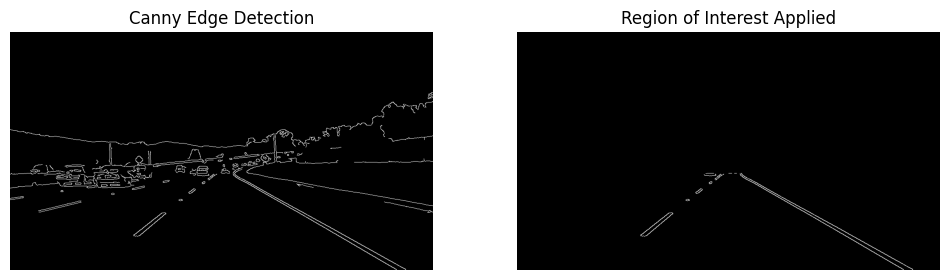

In [5]:

import numpy as np
def region_of_interest(img):
    height, width = img.shape[:2]

    roi_vertices = np.array([
        [(0, height), (width//2 - 50, height//2 + 50), (width//2 + 50, height//2 + 50), (width, height)]
    ], dtype=np.int32)


    mask = np.zeros_like(img)


    cv2.fillPoly(mask, roi_vertices, 255)


    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


roi_image = region_of_interest(edges)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(edges, cmap='gray')
axes[0].set_title("Canny Edge Detection")
axes[0].axis("off")

axes[1].imshow(roi_image, cmap='gray')
axes[1].set_title("Region of Interest Applied")
axes[1].axis("off")

plt.show()

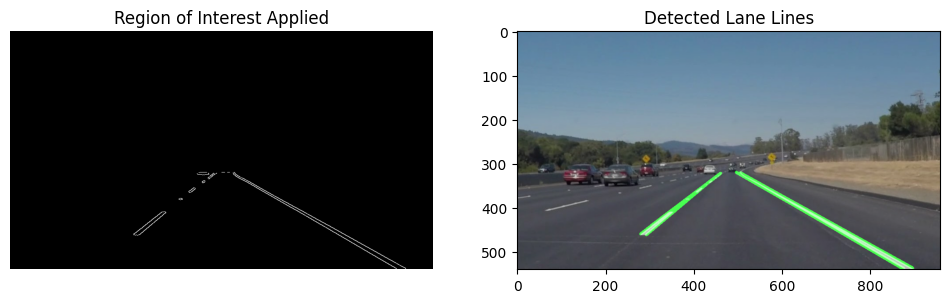

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_lines(img, lines):
    line_img = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else 0
            if 0.5 < abs(slope) < 2:
                cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 5)
    return cv2.addWeighted(img, 0.8, line_img, 1, 0)

lines = cv2.HoughLinesP(roi_image, 1, np.pi / 180, threshold=50, minLineLength=100, maxLineGap=50)

lane_image = draw_lines(image, lines)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(roi_image, cmap='gray')
axes[0].set_title("Region of Interest Applied")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(lane_image, cv2.COLOR_BGR2RGB))
axes[1].set_title("Detected Lane Lines")
axes[1].axis("on")

plt.show()


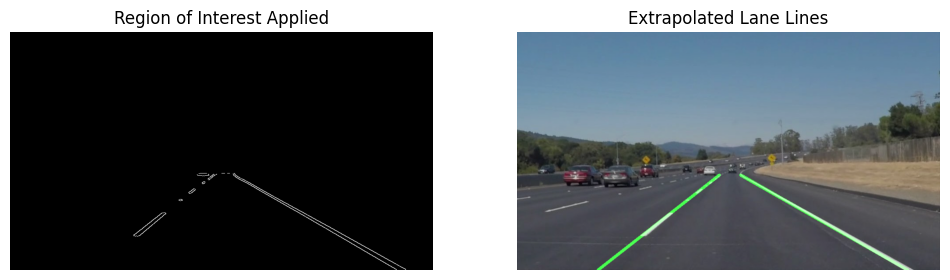

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extrapolate_lines(img, lines):
    left_lines = []
    right_lines = []
    height, width, _ = img.shape

    for line in lines:
        x1, y1, x2, y2 = line[0]
        slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else 0
        if 0.5 < slope < 2:
            right_lines.append((x1, y1, x2, y2))
        elif -2 < slope < -0.5:
            left_lines.append((x1, y1, x2, y2))

    def make_line(points):
        x_coords, y_coords = [], []
        for x1, y1, x2, y2 in points:
            x_coords.extend([x1, x2])
            y_coords.extend([y1, y2])
        if len(x_coords) > 0:
            poly = np.polyfit(y_coords, x_coords, deg=1)
            y1, y2 = height, int(height * 0.6)
            x1, x2 = int(poly[0] * y1 + poly[1]), int(poly[0] * y2 + poly[1])
            return x1, y1, x2, y2
        return None

    left_lane = make_line(left_lines)
    right_lane = make_line(right_lines)

    lane_img = np.zeros_like(img)
    if left_lane:
        cv2.line(lane_img, (left_lane[0], left_lane[1]), (left_lane[2], left_lane[3]), (0, 255, 0), 5)
    if right_lane:
        cv2.line(lane_img, (right_lane[0], right_lane[1]), (right_lane[2], right_lane[3]), (0, 255, 0), 5)

    return cv2.addWeighted(img, 0.8, lane_img, 1, 0)


lines = cv2.HoughLinesP(roi_image, 1, np.pi / 180, threshold=50, minLineLength=100, maxLineGap=50)

lane_image = extrapolate_lines(image, lines)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(roi_image, cmap='gray')
axes[0].set_title("Region of Interest Applied")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(lane_image, cv2.COLOR_BGR2RGB))
axes[1].set_title("Extrapolated Lane Lines")
axes[1].axis("off")

plt.show()

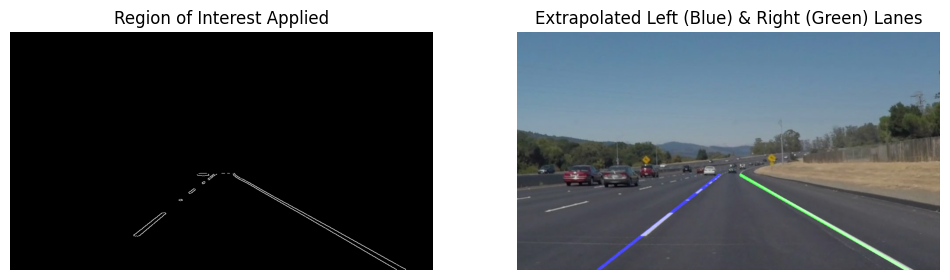

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extrapolate_lines(img, lines):
    left_lines = []
    right_lines = []
    height, width, _ = img.shape

    for line in lines:
        x1, y1, x2, y2 = line[0]
        slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else 0
        if 0.5 < slope < 2:
            right_lines.append((x1, y1, x2, y2))
        elif -2 < slope < -0.5:
            left_lines.append((x1, y1, x2, y2))

    def make_line(points):
        x_coords, y_coords = [], []
        for x1, y1, x2, y2 in points:
            x_coords.extend([x1, x2])
            y_coords.extend([y1, y2])
        if len(x_coords) > 0:
            poly = np.polyfit(y_coords, x_coords, deg=1)
            y1, y2 = height, int(height * 0.6)
            x1, x2 = int(poly[0] * y1 + poly[1]), int(poly[0] * y2 + poly[1])
            return x1, y1, x2, y2
        return None

    left_lane = make_line(left_lines)
    right_lane = make_line(right_lines)

    lane_img = np.zeros_like(img)

    if left_lane:
        cv2.line(lane_img, (left_lane[0], left_lane[1]), (left_lane[2], left_lane[3]), (255, 0, 0), 5) # Left lane in blue
    if right_lane:
        cv2.line(lane_img, (right_lane[0], right_lane[1]), (right_lane[2], right_lane[3]), (0, 255, 0), 5) # Right lane in green

    return cv2.addWeighted(img, 0.8, lane_img, 1, 0)

lines = cv2.HoughLinesP(roi_image, 1, np.pi / 180, threshold=50, minLineLength=100, maxLineGap=50)

lane_image = extrapolate_lines(image, lines)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(roi_image, cmap='gray')
axes[0].set_title("Region of Interest Applied")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(lane_image, cv2.COLOR_BGR2RGB))
axes[1].set_title("Extrapolated Left (Blue) & Right (Green) Lanes")
axes[1].axis("off")

plt.show()

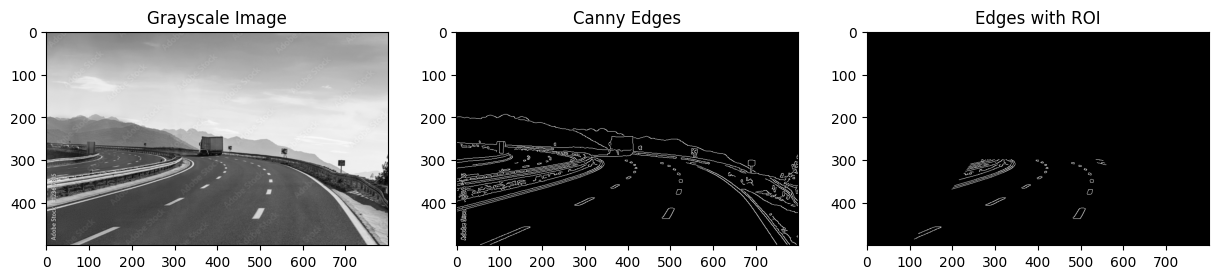

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/highway curve.jpg"
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Error loading image. Check the path!")

# Resize for better visualization
image = cv2.resize(image, (800, 500))

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blur, 50, 150)

# Define a region of interest (ROI)
def region_of_interest(img):
    height, width = img.shape[:2]

    # Define a polygon mask focusing on road lanes
    mask = np.zeros_like(img)
    polygon = np.array([[
        (100, height), (width // 2 - 150, height // 2 + 50),
        (width // 2 + 150, height // 2 + 50), (width - 100, height)
    ]], dtype=np.int32)

    cv2.fillPoly(mask, polygon, 255)
    roi = cv2.bitwise_and(img, mask)
    return roi

# Apply ROI mask
roi_edges = region_of_interest(edges)

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Grayscale Image")
plt.imshow(gray, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Canny Edges")
plt.imshow(edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Edges with ROI")
plt.imshow(roi_edges, cmap='gray')

plt.show()


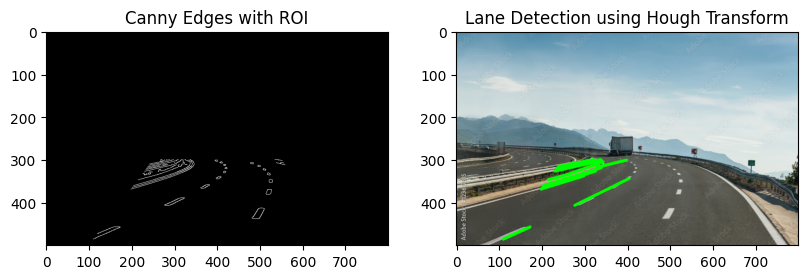

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/highway curve.jpg"  # Update the path
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Error loading image. Check the path!")

# Resize for better visualization
image = cv2.resize(image, (800, 500))

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blur, 50, 150)

# Define a region of interest (ROI)
def region_of_interest(img):
    height, width = img.shape[:2]

    # Define a polygon mask focusing on road lanes
    mask = np.zeros_like(img)
    polygon = np.array([[
        (100, height), (width // 2 - 150, height // 2 + 50),
        (width // 2 + 150, height // 2 + 50), (width - 100, height)
    ]], dtype=np.int32)

    cv2.fillPoly(mask, polygon, 255)
    roi = cv2.bitwise_and(img, mask)
    return roi

# Apply ROI mask
roi_edges = region_of_interest(edges)

# Apply Hough Transform to detect lane lines
def hough_transform(img, original_image):
    lines = cv2.HoughLinesP(img, rho=1, theta=np.pi/180, threshold=40, minLineLength=50, maxLineGap=50)

    # Copy original image for drawing lines
    lane_image = original_image.copy()

    # Draw detected lines
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(lane_image, (x1, y1), (x2, y2), (0, 255, 0), 5)

    return lane_image

# Get the final image with detected lane lines
lane_detected_image = hough_transform(roi_edges, image)

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Canny Edges with ROI")
plt.imshow(roi_edges, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Lane Detection using Hough Transform")
plt.imshow(cv2.cvtColor(lane_detected_image, cv2.COLOR_BGR2RGB))

plt.show()


In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images
roi_image = cv2.imread("/content/roi.jpg")  # ROI with red lane markings
original_image = cv2.imread("/mnt/data/highway curve.jpg")  # Original highway image

# Convert ROI to HSV and extract red color
hsv = cv2.cvtColor(roi_image, cv2.COLOR_BGR2HSV)
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask = cv2.bitwise_or(mask1, mask2)

# Find contours of the detected red lanes
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define ROI coordinates to overlay on the original image
height, width = original_image.shape[:2]
roi_height, roi_width = roi_image.shape[:2]

# Scaling factors to map ROI onto the original image
scale_x = width / roi_width
scale_y = height / roi_height

# Create a copy of the original image for drawing
output_image = original_image.copy()

# Transform and overlay the lane contours onto the original image
for contour in contours:
    transformed_contour = np.array([[int(pt[0][0] * scale_x), int(pt[0][1] * scale_y)] for pt in contour])
    cv2.polylines(output_image, [transformed_contour], isClosed=False, color=(0, 0, 255), thickness=5)

# Display the final output
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title("Lane Curves Mapped on Original Image (Exact ROI)")
plt.axis("off")
plt.show()


AttributeError: 'NoneType' object has no attribute 'shape'

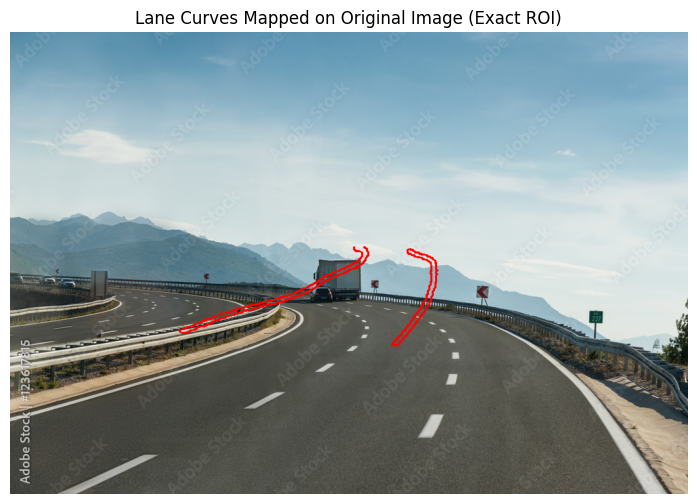

In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images
roi_image = cv2.imread("/content/roi.jpg")  # ROI with red lane markings
original_image = cv2.imread("/content/highway curve.jpg")  # Original highway image # Changed path to /content/highway curve.jpg

# Check if the image loaded correctly
if original_image is None:
    print("Error: Could not load original image. Check the file path.")
    exit() # Exit the script if image loading fails

# Convert ROI to HSV and extract red color
hsv = cv2.cvtColor(roi_image, cv2.COLOR_BGR2HSV)
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 210])
lower_red2 = np.array([160, 50, 100])
upper_red2 = np.array([180, 255, 255])
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask = cv2.bitwise_or(mask1, mask2)

# Find contours of the detected red lanes
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define ROI coordinates to overlay on the original image
height, width = original_image.shape[:2]
roi_height, roi_width = roi_image.shape[:2]

# Scaling factors to map ROI onto the original image
scale_x = width / roi_width
scale_y = height / roi_height

# Create a copy of the original image for drawing
output_image = original_image.copy()

# Transform and overlay the lane contours onto the original image
for contour in contours:
    transformed_contour = np.array([[int(pt[0][0] * scale_x), int(pt[0][1] * scale_y)] for pt in contour])
    cv2.polylines(output_image, [transformed_contour], isClosed=False, color=(0, 0, 255), thickness=2)

# Display the final output
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title("Lane Curves Mapped on Original Image (Exact ROI)")
plt.axis("off")
plt.show()

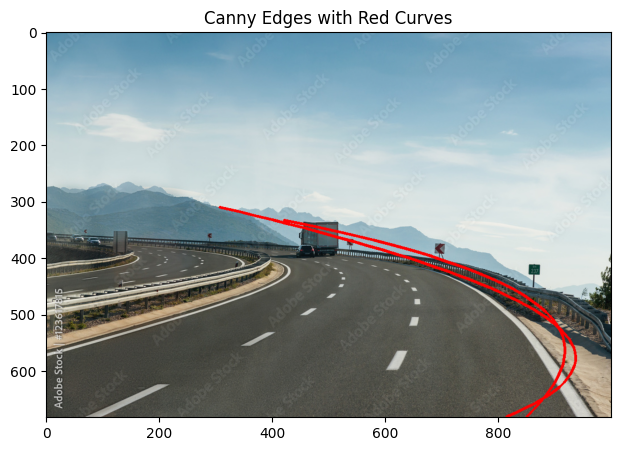

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the processed ROI image (from uploaded file)
image_path = "/content/highway curve.jpg"  # Update with actual path if needed
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Error loading image. Check the path!")

# Convert to grayscale for edge detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 50, 150)

# Extract lane points from edges
def extract_lane_points(edge_img, x_start=400):
    points = np.column_stack(np.where(edge_img > 0))  # Get (y, x) points
    filtered_points = [(x, y) for y, x in points if x > x_start]
    return filtered_points

# Fit and draw the curve exactly on lane edges
def draw_exact_curve(image, lane_points, color):
    if len(lane_points) < 6:  # Need enough points to fit
        return image

    lane_points = np.array(lane_points)
    x = lane_points[:, 0]
    y = lane_points[:, 1]

    # Fit a cubic curve
    curve_fit = np.polyfit(y, x, 3)

    y_curve = np.linspace(min(y), max(y), num=50)
    x_curve = np.polyval(curve_fit, y_curve)

    # Convert points to integer
    curve_points = np.array([[[int(x), int(y)] for x, y in zip(x_curve, y_curve)]], dtype=np.int32)

    # Draw the curve
    curve_image = image.copy()
    cv2.polylines(curve_image, curve_points, isClosed=False, color=color, thickness=3)

    return curve_image

# Get lane points for two curves
lane_points_1 = extract_lane_points(edges, x_start=400)  # Right lane
lane_points_2 = extract_lane_points(edges, x_start=500)  # Left lane

# Draw exact curves on detected lanes
image_with_curves = draw_exact_curve(image, lane_points_1, (0, 0, 255))  # Red curve
image_with_curves = draw_exact_curve(image_with_curves, lane_points_2, (0, 0, 255))  # Red curve

# Display the result
plt.figure(figsize=(10, 5))
plt.title("Canny Edges with Red Curves")
plt.imshow(cv2.cvtColor(image_with_curves, cv2.COLOR_BGR2RGB))
plt.show()


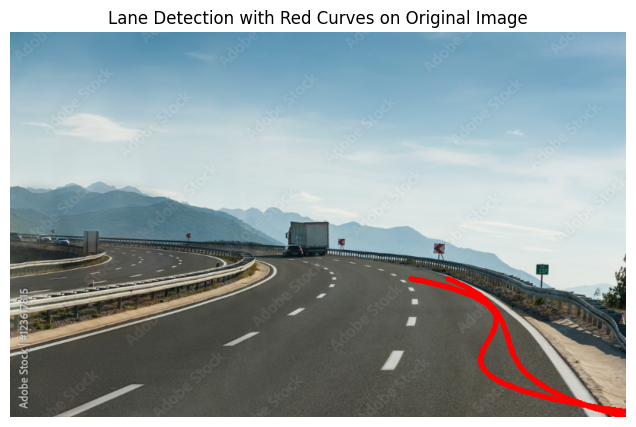

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image (update path if needed)
image_path = "/content/highway curve.jpg"  # Your original image
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Error loading image. Check the path!")

# Resize for better visualization
image = cv2.resize(image, (800, 500))

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blur, 50, 150)

# Define a region of interest (ROI)
def region_of_interest(img):
    height, width = img.shape[:2]
    mask = np.zeros_like(img)
    polygon = np.array([[
        (100, height), (width // 2 - 200, height // 2 + 70),
        (width // 2 + 250, height // 2 + 70), (width - 50, height)
    ]], dtype=np.int32)

    cv2.fillPoly(mask, polygon, 255)
    roi = cv2.bitwise_and(img, mask)
    return roi

# Apply ROI mask
roi_edges = region_of_interest(edges)

# Extract lane points from edges
def extract_lane_points(edge_img, x_start):
    points = np.column_stack(np.where(edge_img > 0))  # Get (y, x) points
    filtered_points = [(x, y) for y, x in points if x > x_start]  # Filter based on x_start
    return filtered_points

# Fit and draw the exact curve on the original image
def draw_exact_curve(image, lane_points, color):
    if len(lane_points) < 6:  # Need enough points to fit a curve
        return image

    lane_points = np.array(lane_points)
    x = lane_points[:, 0]
    y = lane_points[:, 1]

    # Fit a cubic curve
    curve_fit = np.polyfit(y, x, 3)

    y_curve = np.linspace(min(y), max(y), num=50)
    x_curve = np.polyval(curve_fit, y_curve)

    # Convert points to integer
    curve_points = np.array([[[int(x), int(y)] for x, y in zip(x_curve, y_curve)]], dtype=np.int32)

    # Draw the curve on the original image
    curve_image = image.copy()
    cv2.polylines(curve_image, curve_points, isClosed=False, color=color, thickness=5)

    return curve_image

# Get lane points for two curves
lane_points_1 = extract_lane_points(roi_edges, x_start=400)  # Right lane
lane_points_2 = extract_lane_points(roi_edges, x_start=500)  # Left lane

# Draw exact curves on the original image
image_with_curves = draw_exact_curve(image, lane_points_1, (0, 0, 255))  # Red curve
image_with_curves = draw_exact_curve(image_with_curves, lane_points_2, (0, 0, 255))  # Red curve

# Display the result
plt.figure(figsize=(10, 5))
plt.title("Lane Detection with Red Curves on Original Image")
plt.imshow(cv2.cvtColor(image_with_curves, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


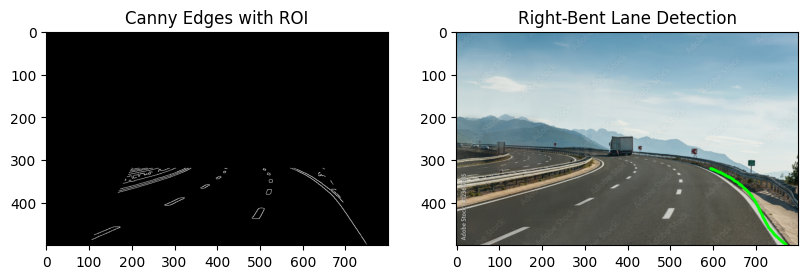

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/highway curve.jpg"  # Update with your actual image path
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Error loading image. Check the path!")

# Resize for better visualization
image = cv2.resize(image, (800, 500))

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blur, 50, 150)

# Define a region of interest (ROI)
def region_of_interest(img):
    height, width = img.shape[:2]
    mask = np.zeros_like(img)
    polygon = np.array([[
        (100, height), (width // 2 - 200, height // 2 + 70),
        (width // 2 + 250, height // 2 + 70), (width - 50, height)
    ]], dtype=np.int32)

    cv2.fillPoly(mask, polygon, 255)
    roi = cv2.bitwise_and(img, mask)
    return roi

# Apply ROI mask
roi_edges = region_of_interest(edges)

# Extract lane points from Hough Transform
def get_lane_points(img):
    lines = cv2.HoughLinesP(img, rho=1, theta=np.pi/180, threshold=40, minLineLength=50, maxLineGap=50)
    lane_points = []

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            if x1 > 400:  # Prioritize right-lane points
                lane_points.append((x1, y1))
                lane_points.append((x2, y2))

    return lane_points

# Fit a smooth curve with rightward bend
def draw_bent_curve(image, lane_points):
    if len(lane_points) < 6:  # Need enough points to fit a curve
        return image

    lane_points = np.array(lane_points)
    x = lane_points[:, 0]
    y = lane_points[:, 1]

    # Fit a cubic curve (better control for bending)
    curve_fit = np.polyfit(y, x, 3)  # Fit x as a function of y

    y_curve = np.linspace(min(y), max(y), num=50)  # Smooth y values
    x_curve = np.polyval(curve_fit, y_curve)

    # Adjust x-values to exaggerate rightward bend
    x_curve += 0.1 * (y_curve - min(y_curve))  # Shift rightward gradually

    # Convert curve points to int
    curve_points = np.array([[[int(x), int(y)] for x, y in zip(x_curve, y_curve)]], dtype=np.int32)

    # Draw the smooth lane curve
    curve_image = image.copy()
    cv2.polylines(curve_image, curve_points, isClosed=False, color=(0, 255, 0), thickness=5)

    return curve_image

# Get lane points and draw the bent curve
lane_pixels = get_lane_points(roi_edges)
bent_curve_image = draw_bent_curve(image, lane_pixels)

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Canny Edges with ROI")
plt.imshow(roi_edges, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Right-Bent Lane Detection")
plt.imshow(cv2.cvtColor(bent_curve_image, cv2.COLOR_BGR2RGB))

plt.show()


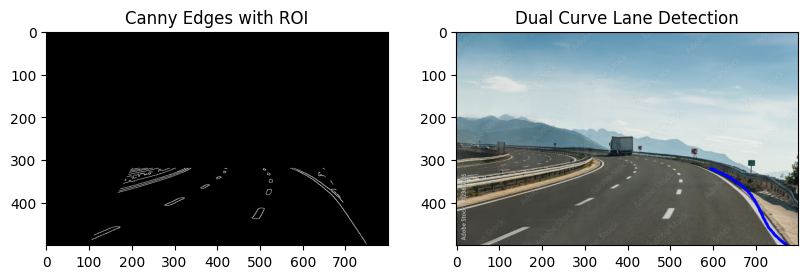

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/highway curve.jpg"  # Update with your actual image path
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Error loading image. Check the path!")

# Resize for better visualization
image = cv2.resize(image, (800, 500))

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blur, 50, 150)

# Define a region of interest (ROI)
def region_of_interest(img):
    height, width = img.shape[:2]
    mask = np.zeros_like(img)
    polygon = np.array([[
        (100, height), (width // 2 - 200, height // 2 + 70),
        (width // 2 + 250, height // 2 + 70), (width - 50, height)
    ]], dtype=np.int32)

    cv2.fillPoly(mask, polygon, 255)
    roi = cv2.bitwise_and(img, mask)
    return roi

# Apply ROI mask
roi_edges = region_of_interest(edges)

# Extract lane points from Hough Transform
def get_lane_points(img, x_start=400):
    lines = cv2.HoughLinesP(img, rho=1, theta=np.pi/180, threshold=40, minLineLength=50, maxLineGap=50)
    lane_points = []

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            if x1 > x_start:  # Filter based on the x_start value
                lane_points.append((x1, y1))
                lane_points.append((x2, y2))

    return lane_points

# Fit a smooth curve
def draw_bent_curve(image, lane_points, color):
    if len(lane_points) < 6:  # Need enough points to fit a curve
        return image

    lane_points = np.array(lane_points)
    x = lane_points[:, 0]
    y = lane_points[:, 1]

    # Fit a cubic curve
    curve_fit = np.polyfit(y, x, 3)  # Fit x as a function of y

    y_curve = np.linspace(min(y), max(y), num=50)  # Smooth y values
    x_curve = np.polyval(curve_fit, y_curve)

    # Adjust x-values for better separation between curves
    x_curve += 0.1 * (y_curve - min(y_curve))

    # Convert curve points to int
    curve_points = np.array([[[int(x), int(y)] for x, y in zip(x_curve, y_curve)]], dtype=np.int32)

    # Draw the curve
    curve_image = image.copy()
    cv2.polylines(curve_image, curve_points, isClosed=False, color=color, thickness=5)

    return curve_image

# Get lane points for two curves
lane_pixels_1 = get_lane_points(roi_edges, x_start=400)
lane_pixels_2 = get_lane_points(roi_edges, x_start=300)  # New curve from x=500

# Draw both curves
image_with_curves = draw_bent_curve(image, lane_pixels_1, (0, 255, 0))  # Green curve
image_with_curves = draw_bent_curve(image_with_curves, lane_pixels_2, (255, 0, 0))  # Blue curve

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Canny Edges with ROI")
plt.imshow(roi_edges, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Dual Curve Lane Detection")
plt.imshow(cv2.cvtColor(image_with_curves, cv2.COLOR_BGR2RGB))

plt.show()


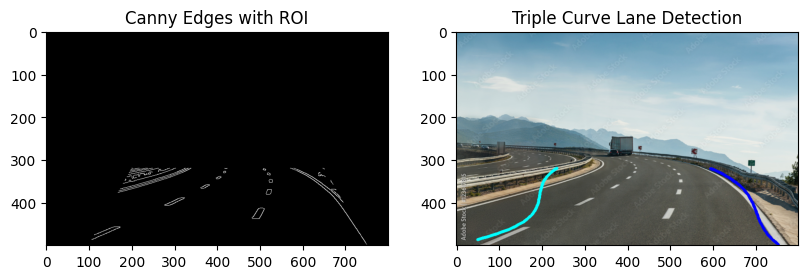

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/highway curve.jpg"  # Update with your actual image path
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Error loading image. Check the path!")

# Resize for better visualization
image = cv2.resize(image, (800, 500))

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blur, 50, 150)

# Define a region of interest (ROI)
def region_of_interest(img):
    height, width = img.shape[:2]
    mask = np.zeros_like(img)
    polygon = np.array([[
        (100, height), (width // 2 - 200, height // 2 + 70),
        (width // 2 + 250, height // 2 + 70), (width - 50, height)
    ]], dtype=np.int32)

    cv2.fillPoly(mask, polygon, 255)
    roi = cv2.bitwise_and(img, mask)
    return roi

# Apply ROI mask
roi_edges = region_of_interest(edges)

# Extract lane points from Hough Transform
def get_lane_points(img, x_start=400, mirrored=False):
    lines = cv2.HoughLinesP(img, rho=1, theta=np.pi/180, threshold=40, minLineLength=50, maxLineGap=50)
    lane_points = []

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            if mirrored:
                if x1 < x_start:  # Pick left lane points for mirroring
                    lane_points.append((x1, y1))
                    lane_points.append((x2, y2))
            else:
                if x1 > x_start:  # Pick right lane points
                    lane_points.append((x1, y1))
                    lane_points.append((x2, y2))

    return lane_points

# Fit a smooth curve
def draw_bent_curve(image, lane_points, color, shift_x=0):
    if len(lane_points) < 6:  # Need enough points to fit a curve
        return image

    lane_points = np.array(lane_points)
    x = lane_points[:, 0]
    y = lane_points[:, 1]

    # Fit a cubic curve
    curve_fit = np.polyfit(y, x, 3)  # Fit x as a function of y

    y_curve = np.linspace(min(y), max(y), num=50)  # Smooth y values
    x_curve = np.polyval(curve_fit, y_curve)

    # Adjust x-values to shift curve
    x_curve += shift_x  # Shift left or right based on shift_x

    # Convert curve points to int
    curve_points = np.array([[[int(x), int(y)] for x, y in zip(x_curve, y_curve)]], dtype=np.int32)

    # Draw the curve
    curve_image = image.copy()
    cv2.polylines(curve_image, curve_points, isClosed=False, color=color, thickness=5)

    return curve_image

# Get lane points for three curves
lane_pixels_1 = get_lane_points(roi_edges, x_start=400)  # Right lane (Green)
lane_pixels_2 = get_lane_points(roi_edges, x_start=500)  # Mid lane (Blue)
lane_pixels_3 = get_lane_points(roi_edges, x_start=500, mirrored=True)  # Left lane (Red)

# Draw three curves
image_with_curves = draw_bent_curve(image, lane_pixels_1, (0, 255, 0))  # Green curve
image_with_curves = draw_bent_curve(image_with_curves, lane_pixels_2, (255, 0, 0))  # Blue curve
image_with_curves = draw_bent_curve(image_with_curves, lane_pixels_3, (255, 255, 0), shift_x=-50)  # Red curve (Shift left)

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Canny Edges with ROI")
plt.imshow(roi_edges, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Triple Curve Lane Detection")
plt.imshow(cv2.cvtColor(image_with_curves, cv2.COLOR_BGR2RGB))

plt.show()


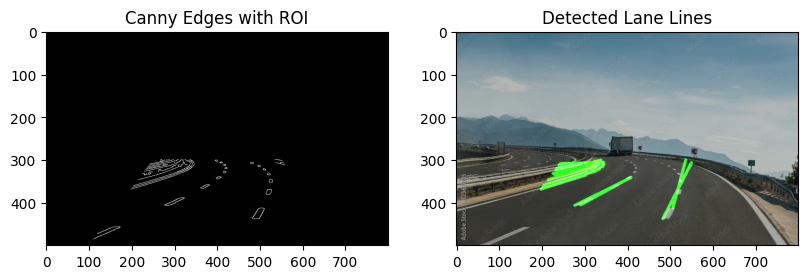

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/highway curve.jpg"
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Error loading image. Check the path!")

# Resize for better visualization
image = cv2.resize(image, (800, 500))

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blur, 50, 150)

# Define the correct Region of Interest (ROI)
def region_of_interest(img):
    height, width = img.shape[:2]

    # Define the polygon mask focusing only on road lanes
    mask = np.zeros_like(img)
    polygon = np.array([[
        (100, height), (width // 2 - 150, height // 2 + 50),
        (width // 2 + 150, height // 2 + 50), (width - 100, height)
    ]], dtype=np.int32)

    cv2.fillPoly(mask, polygon, 255)
    roi = cv2.bitwise_and(img, mask)
    return roi

# Apply ROI mask
roi_edges = region_of_interest(edges)

# Apply Hough Line Transform
def hough_transform(img, orig_img):
    lines = cv2.HoughLinesP(img, rho=1, theta=np.pi/180, threshold=10, minLineLength=100, maxLineGap=50)
    line_img = np.zeros_like(orig_img)

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 5)  # Green lines for lanes

    # Overlay detected lanes on original image
    final_output = cv2.addWeighted(orig_img, 0.8, line_img, 2, 0)
    return final_output

# Apply Hough Transform on ROI
hough_result = hough_transform(roi_edges, image)

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Canny Edges with ROI")
plt.imshow(roi_edges, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Detected Lane Lines")
plt.imshow(cv2.cvtColor(hough_result, cv2.COLOR_BGR2RGB))

plt.show()


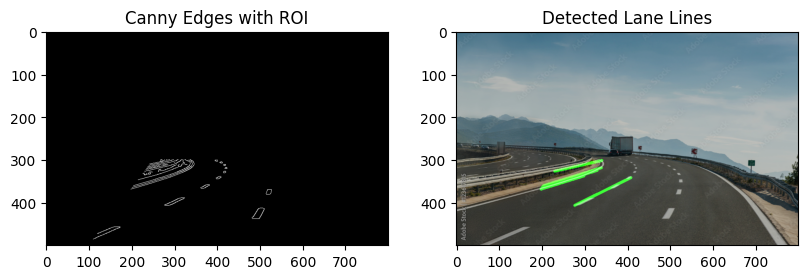

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/highway curve.jpg"
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Error loading image. Check the path!")

# Resize for better visualization
image = cv2.resize(image, (800, 500))

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blur, 50, 150)

# Define a region of interest (ROI)
def region_of_interest(img):
    height, width = img.shape[:2]

    # Define a polygon mask focusing on road lanes
    mask = np.zeros_like(img)
    polygon = np.array([[
        (100, height), (width // 2 - 150, height // 2 + 50),
        (width // 2 + 50, height // 2 + 50), (width - 100, height)
    ]], dtype=np.int32)

    cv2.fillPoly(mask, polygon, 255)
    roi = cv2.bitwise_and(img, mask)
    return roi

# Apply ROI mask
roi_edges = region_of_interest(edges)

# Hough Line Transform Parameters
def hough_transform(img, orig_img):
    lines = cv2.HoughLinesP(img, rho=1, theta=np.pi/180, threshold=50, minLineLength=100, maxLineGap=50)
    line_img = np.zeros_like(orig_img)

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 5)

    # Overlay detected lanes on original image
    final_output = cv2.addWeighted(orig_img, 0.8, line_img, 1, 0)
    return final_output

# Apply Hough Transform
hough_result = hough_transform(roi_edges, image)

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Canny Edges with ROI")
plt.imshow(roi_edges, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Detected Lane Lines")
plt.imshow(cv2.cvtColor(hough_result, cv2.COLOR_BGR2RGB))

plt.show()


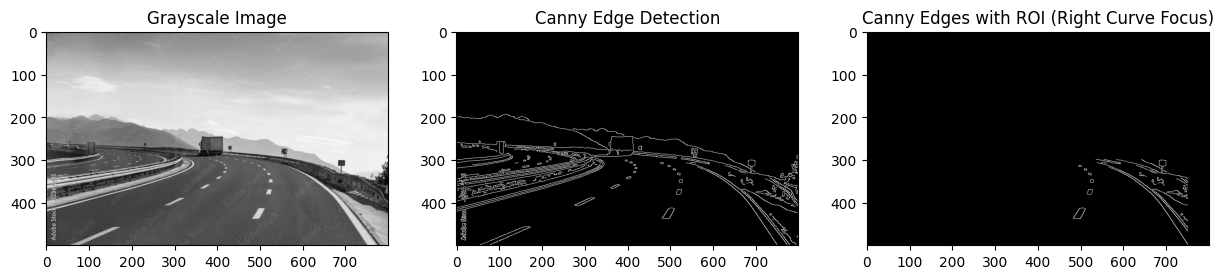

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/highway curve.jpg"
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Error loading image. Check the path!")

# Resize for better visualization
image = cv2.resize(image, (800, 500))

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Adaptive Canny Edge Detection for better accuracy
low_thresh = 50
high_thresh = 150
edges = cv2.Canny(blur, low_thresh, high_thresh)

# Define a refined region of interest (ROI) focusing on the **right curve only**
def region_of_interest(img):
    height, width = img.shape[:2]

    # Adjusted polygon for **right lane focus**
    mask = np.zeros_like(img)
    polygon = np.array([[
        (width // 2 - 50, height),   # Bottom-left point shifted right
        (width // 2 + 100, height // 2 + 50),  # Middle point shifted right
        (width - 50, height // 2 + 50),  # Upper right
        (width - 50, height)  # Bottom-right
    ]], dtype=np.int32)

    cv2.fillPoly(mask, polygon, 255)
    roi = cv2.bitwise_and(img, mask)
    return roi

# Apply improved ROI mask
roi_edges = region_of_interest(edges)

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Grayscale Image")
plt.imshow(gray, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Canny Edge Detection")
plt.imshow(edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Canny Edges with ROI (Right Curve Focus)")
plt.imshow(roi_edges, cmap='gray')

plt.show()


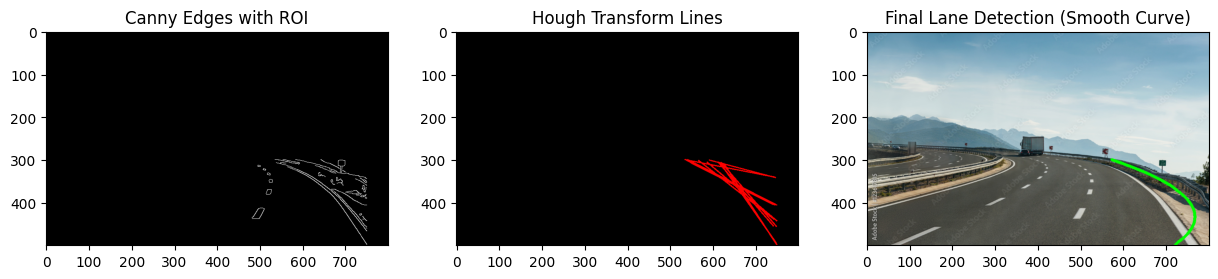

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/highway curve.jpg"
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Error loading image. Check the path!")

# Resize for better visualization
image = cv2.resize(image, (800, 500))

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Adaptive Canny Edge Detection
low_thresh = 50
high_thresh = 150
edges = cv2.Canny(blur, low_thresh, high_thresh)

# Define a refined region of interest (ROI) focusing on **right lane curve**
def region_of_interest(img):
    height, width = img.shape[:2]

    # Adjusted polygon for **right lane focus**
    mask = np.zeros_like(img)
    polygon = np.array([[
        (width // 2 - 50, height),   # Bottom-left point shifted right
        (width // 2 + 100, height // 2 + 50),  # Middle point shifted right
        (width - 50, height // 2 + 50),  # Upper right
        (width - 50, height)  # Bottom-right
    ]], dtype=np.int32)

    cv2.fillPoly(mask, polygon, 255)
    roi = cv2.bitwise_and(img, mask)
    return roi

# Apply ROI mask
roi_edges = region_of_interest(edges)

# Hough Transform for line segment detection
lines = cv2.HoughLinesP(roi_edges, 1, np.pi / 180, threshold=50, minLineLength=50, maxLineGap=100)

# Function to fit and draw a smooth curved lane
def fit_curve_and_draw(img, lines):
    if lines is None:
        return img  # No lines detected

    points = []
    for line in lines:
        for x1, y1, x2, y2 in line:
            points.append((x1, y1))
            points.append((x2, y2))

    # Convert to numpy array
    points = np.array(points)

    # Fit a second-degree polynomial curve
    if len(points) > 5:  # Need enough points to fit a curve
        poly = np.polyfit(points[:, 1], points[:, 0], deg=2)  # Fit x = f(y)
        y_vals = np.linspace(points[:, 1].min(), points[:, 1].max(), num=50)
        x_vals = np.polyval(poly, y_vals)

        # Draw the smooth curve on the lane
        for i in range(len(y_vals) - 1):
            cv2.line(img, (int(x_vals[i]), int(y_vals[i])),
                          (int(x_vals[i+1]), int(y_vals[i+1])), (0, 255, 0), 5)

    return img

# Draw detected lane curve
lane_image = np.copy(image)
lane_image = fit_curve_and_draw(lane_image, lines)

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Canny Edges with ROI")
plt.imshow(roi_edges, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Hough Transform Lines")
hough_lines_image = np.zeros_like(image)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(hough_lines_image, (x1, y1), (x2, y2), (255, 0, 0), 2)
plt.imshow(hough_lines_image)

plt.subplot(1, 3, 3)
plt.title("Final Lane Detection (Smooth Curve)")
plt.imshow(cv2.cvtColor(lane_image, cv2.COLOR_BGR2RGB))

plt.show()
